In [1]:
import pandas as pd
import datetime as dt
import requests

In [99]:
def get_trades_range(startDate, endDate):
    "provide dates in 'YYYY-MM-DD' format"
    url = f"https://statsapi.mlb.com/api/v1/transactions"
    response = requests.get(url, {
            "startDate" :startDate,
            "endDate" : endDate,
            "sportId" : 1
        })
    trans_df = pd.DataFrame(response.json()["transactions"])
    trades_df = trans_df.query("typeDesc == 'Trade'").sort_values("date").drop_duplicates(subset=["id"])
    trades_df["date"] = trades_df.date.apply(pd.to_datetime)
    trades_df["month"] = trades_df["date"].dt.month_name()
    trades_df["day"] = trades_df["date"].dt.day
    trades_df['week_of_month'] = pd.cut(
        trades_df['day'],
        bins=[0, 7, 14, 21, 31],  # hardcoded for up to 31_day months
        labels=['1', '2', '3', '4']
    )
    trades_df["month_week"] = trades_df['month'] + "_" + trades_df["week_of_month"].astype(str)
    return trades_df

In [100]:
trades_24 = get_trades_range('2024-01-01', '2024-07-31')
trades_25 = get_trades_range('2025-01-01', '2025-07-31')

In [101]:
monthly_24 = trades_24\
    .set_index("date")\
    .groupby("month_week")\
    .size()

In [102]:
monthly_25 = trades_25\
    .set_index("date")\
    .groupby("month_week")\
    .size()

In [103]:
monthly_both = pd.concat([monthly_24, monthly_25], axis=1, ignore_index=True)

In [104]:
month_order = [
    'January_1', 'January_2','January_3','January_4',
    'February_1','February_2','February_3','February_4', 
    'March_1','March_2','March_3','March_4', 
    'April_1','April_2','April_3','April_4', 
    'May_1','May_2','May_3','May_4', 
    'June_1','June_2','June_3','June_4',
    'July_1','July_2','July_3','July_4', 
    'August_1'
]

# Convert index to CategoricalIndex with calendar order
monthly_both.index = pd.CategoricalIndex(monthly_both.index, categories=month_order, ordered=True)

# Now sort the index
monthly_both = monthly_both.sort_index()

In [105]:
monthly_both.rename({0:"2024", 1:"2025"},axis=1)

,2024,2025
month_week,,
January_1,4,4.0
January_2,1,4.0
January_3,2,8.0
January_4,5,6.0
February_1,11,6.0
February_2,6,1.0
February_3,4,NaN
February_4,2,1.0
March_1,1,NaN


In [106]:
import matplotlib.pyplot as plt

In [107]:
# plt.xkcd()
# plt.rcdefaults() 
plt.style.use('fivethirtyeight')

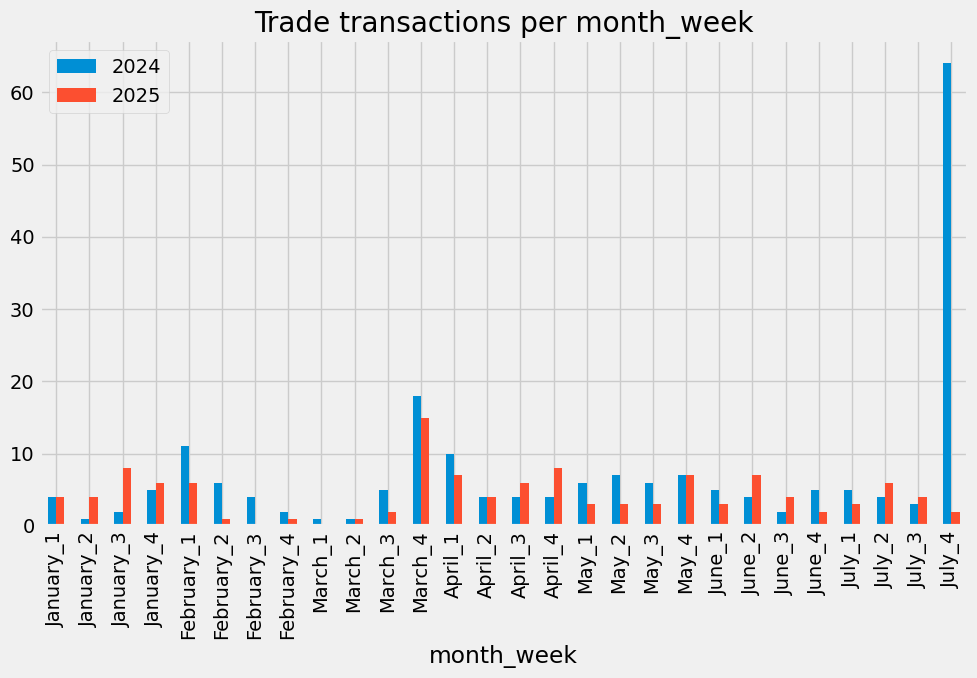

In [110]:

monthly_both.rename({0:"2024", 1:"2025"},axis=1).plot(kind="bar", title="Trade transactions per month_week", figsize=(10,7))
plt.tight_layout()
plt.savefig("trades_per_month_week_24_vs_25.png")